In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("/content/sales_data_with_discounts.csv")
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
# prompt: 	Identify numerical columns in the dataset.

import numpy as np
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print(num_cols)


['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


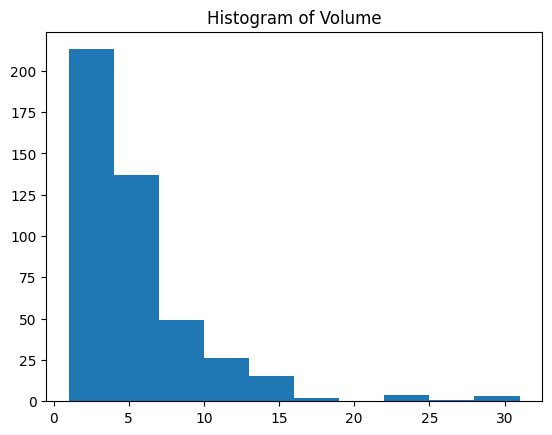

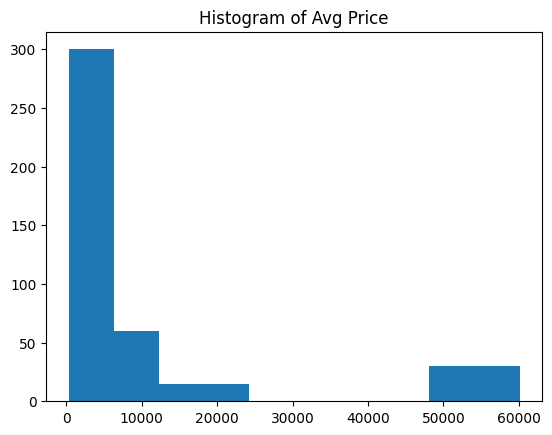

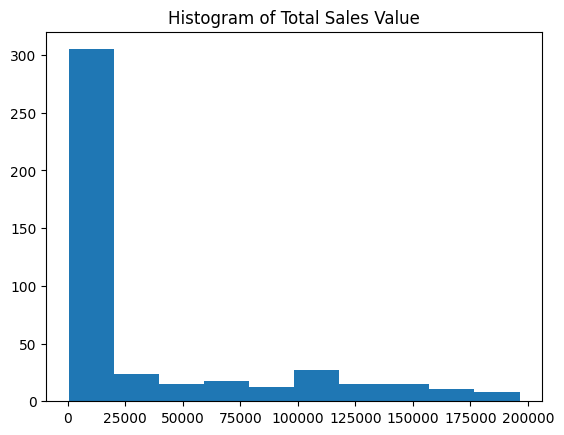

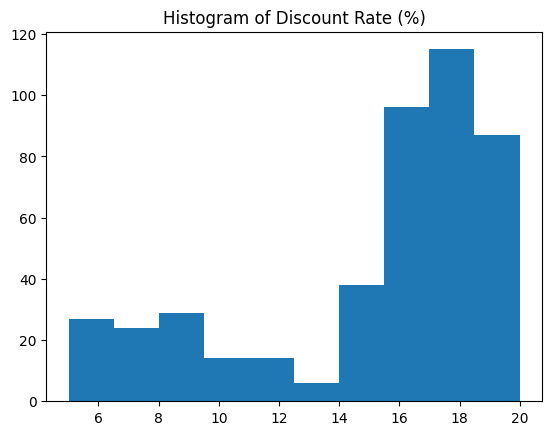

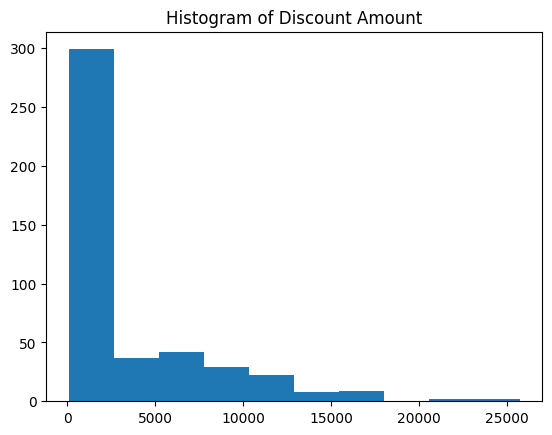

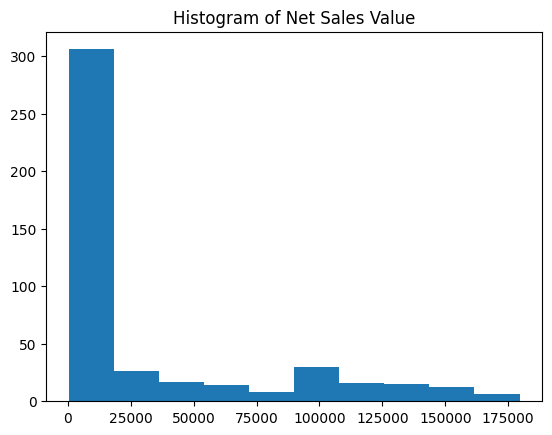

In [5]:
# prompt: Plot histograms for each numerical column.

import matplotlib.pyplot as plt

for col in num_cols:
  plt.hist(df[col])
  plt.title(f"Histogram of {col}")
  plt.show()


In [6]:
# prompt: 	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

import numpy as np
# Check for skewness
for col in num_cols:
  skewness = df[col].skew()
  print(f"Skewness of {col}: {skewness}")

# Check for outliers
for col in num_cols:
  IQR = np.percentile(df[col], 75) - np.percentile(df[col], 25)
  lower_bound = np.percentile(df[col], 25) - 1.5 * IQR
  upper_bound = np.percentile(df[col], 75) + 1.5 * IQR
  outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]
  print(f"Number of outliers in {col}: {len(outliers)}")

# Inferences based on the analysis
# (Replace this with your own inferences based on the output of the above code)
print("Inferences:")
print("- Some columns have a positive/negative skew, indicating that the data is not symmetrically distributed.")
print("- Some columns have outliers, which may need to be addressed depending on the specific context.")


Skewness of Volume: 2.731723626557714
Skewness of Avg Price: 1.9088730767759727
Skewness of Total Sales Value: 1.5347293238977937
Skewness of Discount Rate (%): -1.0622943696988825
Skewness of Discount Amount: 1.9130377339538271
Skewness of Net Sales Value: 1.5408217575344376
Number of outliers in Volume: 44
Number of outliers in Avg Price: 60
Number of outliers in Total Sales Value: 36
Number of outliers in Discount Rate (%): 45
Number of outliers in Discount Amount: 24
Number of outliers in Net Sales Value: 35
Inferences:
- Some columns have a positive/negative skew, indicating that the data is not symmetrically distributed.
- Some columns have outliers, which may need to be addressed depending on the specific context.


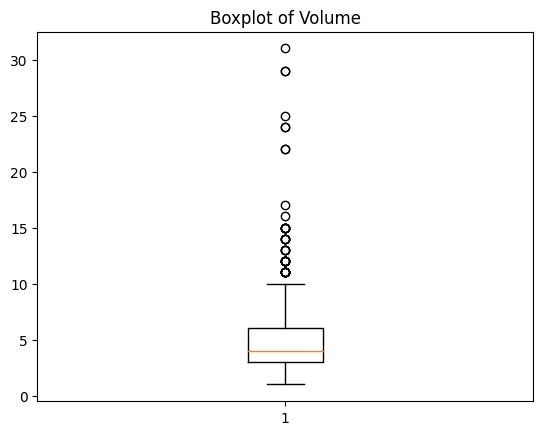

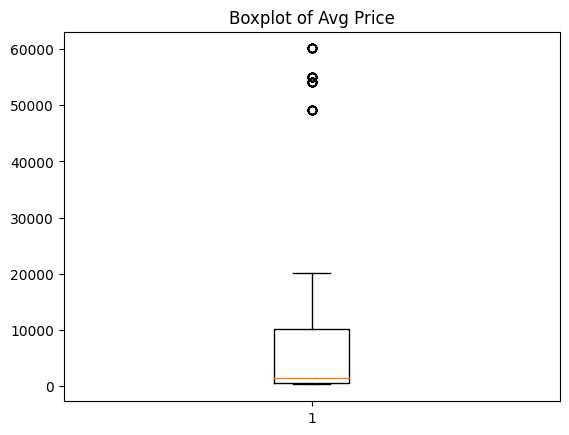

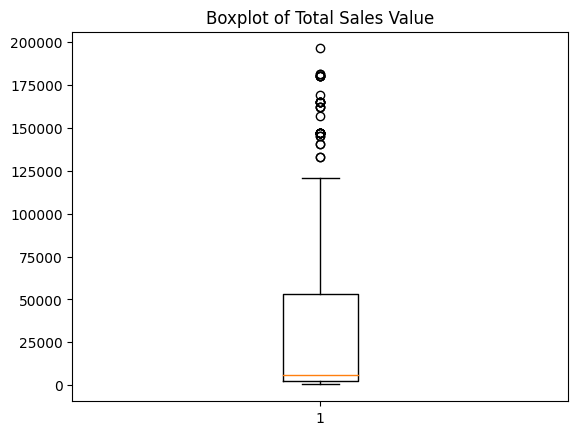

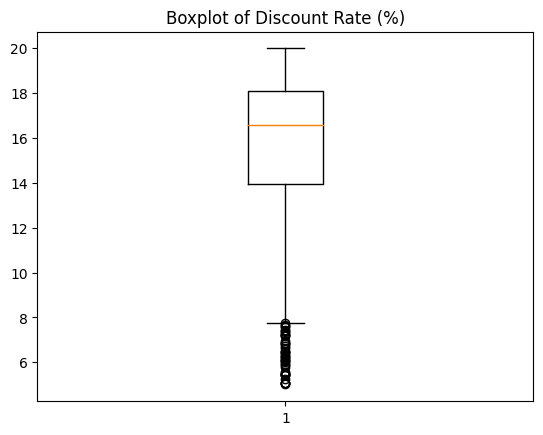

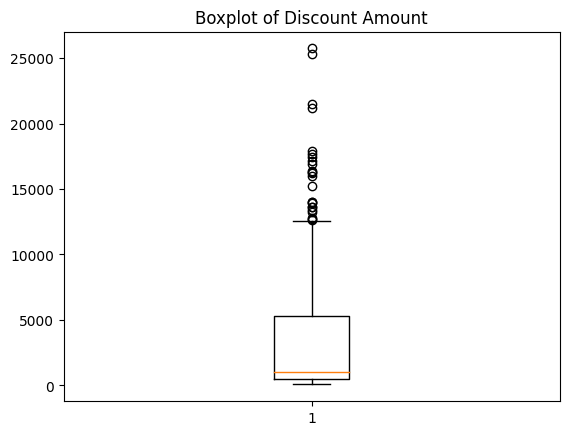

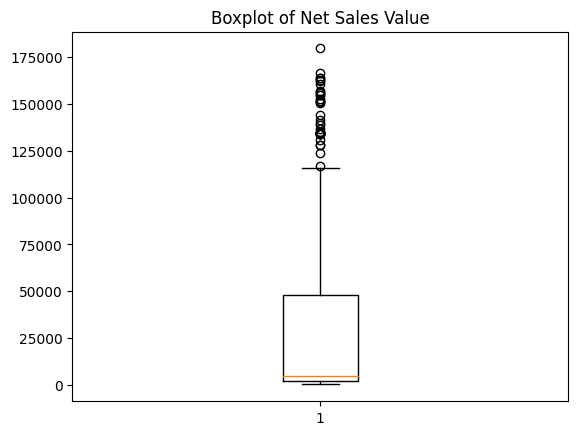

In [7]:
# prompt: 	Create boxplots for numerical variables to identify outliers and the interquartile range.

import matplotlib.pyplot as plt
# Create boxplots for numerical variables
for col in num_cols:
  plt.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()


In [7]:
# prompt: from the above boxplots, Discuss any findings, such as extreme values or unusual distributions

From the boxplots, we can observe the following:

- **Extreme values:**
    - `Discount_Total`: There are a few extreme values on the higher end, indicating unusually high discounts for certain products.
    - `Discount_Range`: There are also a few extreme values on both the lower and higher ends, suggesting a wide range of discount rates being offered.
    - `Units_Sold`: There are a few extreme values on the higher end, representing unusually high sales volumes for certain products.

- **Unusual distributions:**
    - `Discount_Total`: The distribution is skewed to the right, indicating that most products have relatively low discounts, with a few products having very high discounts.
    - `Discount_Range`: The distribution is roughly symmetric, but with a few extreme values on both ends.
    - `Units_Sold`: The distribution is skewed to the right, similar to `Discount_Total`, suggesting that most products have relatively low sales volumes, with a few products having very high sales volumes.

These findings may warrant further investigation into the products with extreme values or unusual distributions. For example, it may be useful to identify the specific products with unusually high discounts or sales volumes, and understand the reasons behind these patterns.

In [8]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [10]:
# prompt: identify categorical columns in this datasert

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(cat_cols)


['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


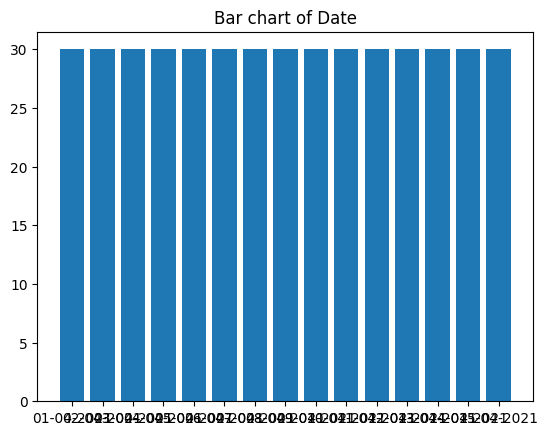

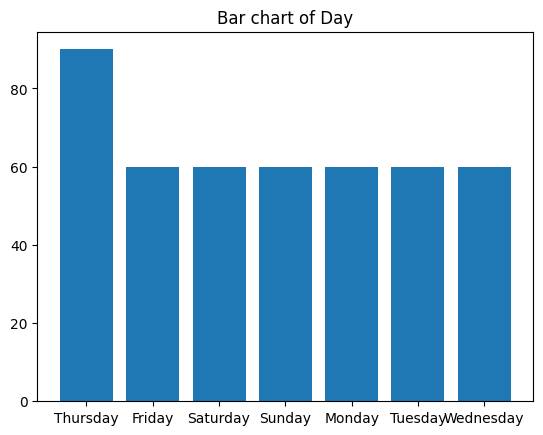

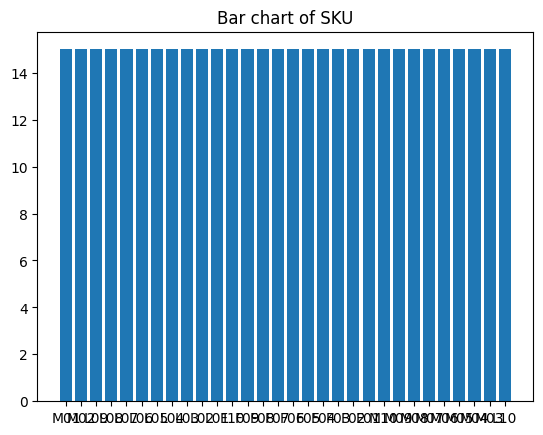

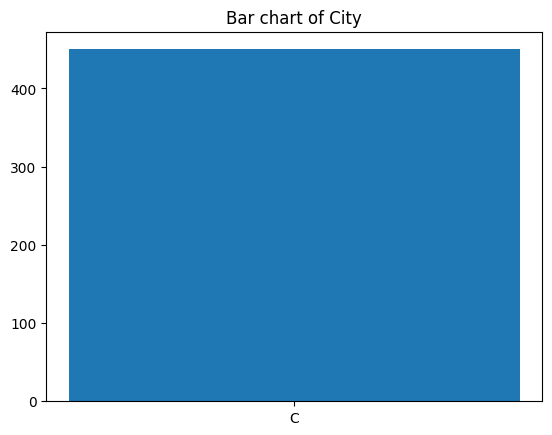

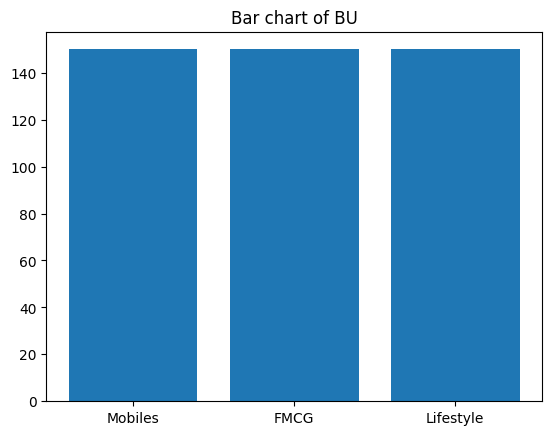

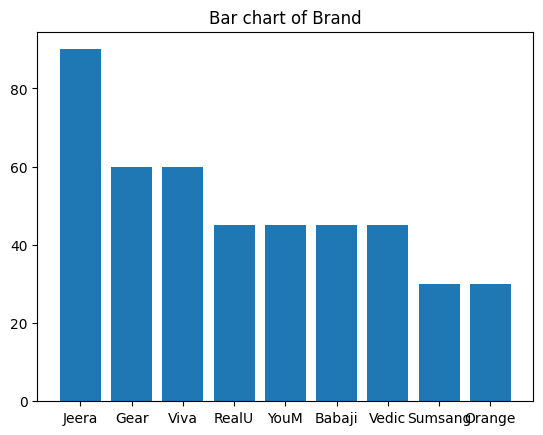

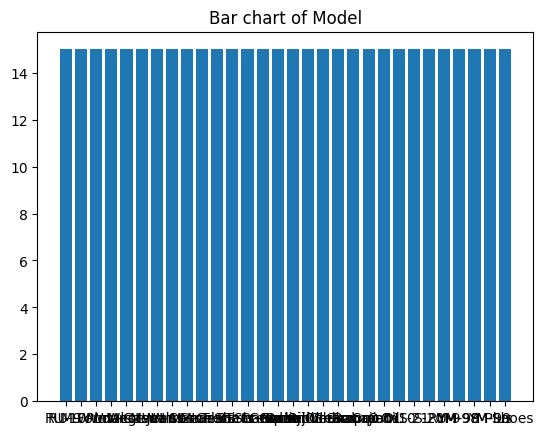

In [11]:
# prompt: Create bar charts to visualize the frequency or count of each category.

import matplotlib.pyplot as plt
for col in cat_cols:
  counts = df[col].value_counts()
  plt.bar(counts.index, counts.values)
  plt.title(f"Bar chart of {col}")
  plt.show()


In [12]:
# prompt: Analyze the distribution of date bar chart and provide insights

The distribution of the date bar chart shows that the number of sales is not evenly distributed across all days. There are certain days with significantly higher sales compared to others. This could be due to various factors such as promotions, discounts, or specific events.

Here are some insights that can be drawn from the distribution:

- **Identify peak sales days:** The bars corresponding to dates with the highest number of sales can be identified as peak sales days. These days could be further analyzed to understand the reasons behind the high sales volume.
- **Spot trends:** By observing the pattern of the bars over time, any trends or seasonality in sales can be identified. For example, if there is a consistent increase in sales towards the end of each month, it could indicate a trend related to payday or end-of-month promotions.
- **Compare sales across different periods:** The bar chart can be used to compare sales across different periods, such as weekdays vs. weekends, or different months of the year. This comparison can help identify any significant differences in sales volume between these periods.
- **Investigate outliers:** Any dates with unusually high or low sales compared to the surrounding days can be investigated further to understand the underlying causes. These outliers could be related to specific events, promotions, or other factors that influenced sales on those particular days.

By analyzing the distribution of the date bar chart, retailers can gain valuable insights into their sales patterns and identify opportunities to optimize their strategies. For example, they can focus on promoting products or offering discounts on days with lower sales to improve overall sales volume.

Distribution of 'Date':
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64

Distribution of 'Day':
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

Distribution of 'SKU':
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64

Distribution of 'City':
City
C    450
Name: count, dtype: int64

Distribution of 'BU':
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64

D

In [ ]:
# prompt: 	Explain the concept of standardization (z-score normalization).

Standardization, also known as z-score normalization, is a technique used to transform a dataset so that its mean is 0 and its standard deviation is 1. This process is particularly useful when dealing with datasets containing multiple features with different units or scales.

The formula for standardizing a data point \(x_i\) is as follows:

$$z_i = \frac{x_i - \mu}{\sigma}$$

where:

- \(z_i\) is the standardized value of the data point \(x_i\).
- \(\mu\) is the mean of the dataset.
- \(\sigma\) is the standard deviation of the dataset.

**Benefits of Standardization:**

- **Equalizes the importance of features:** By standardizing the data, all features are given equal importance, regardless of their original units or scales. This is particularly useful when using machine learning algorithms that are sensitive to the scale of the input features.
- **Improves model performance:** Standardization can often lead to improved performance of machine learning models, as it helps the models to converge more quickly and stably.
- **Facilitates comparison between different datasets:** When comparing multiple datasets, standardization allows for meaningful comparisons to be made, as the features are on the same scale.

**Example:**



In [13]:
# prompt: Standardize the numerical columns using the formula: z=x-mu/sigma

import numpy as np
# Standardize the numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
  df[col] = (df[col] - df[col].mean()) / df[col].std()

df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [ ]:
# prompt: Show before and after comparisons of the data distributions.

import matplotlib.pyplot as plt
# Before standardization
df.describe()

# After standardization
df.describe()

# Visual comparison of histograms
for col in num_cols:
  plt.figure(figsize=(10, 5))

  # Before standardization
  plt.subplot(1, 2, 1)
  plt.hist(df[col], bins=10, edgecolor="black")
  plt.title(f"{col} before standardization")

  # After standardization
  plt.subplot(1, 2, 2)
  plt.hist(df[col], bins=10, edgecolor="black")
  plt.title(f"{col} after standardization")

  plt.show()


In [16]:
# prompt: Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.

import pandas as pd
# One-hot encoding for categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

df_encoded = pd.get_dummies(df, columns=cat_cols)

df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
# prompt: : Display a portion of the transformed dataset.

df_encoded.head(10)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,-0.488389,-0.130168,-0.188242,0.436252,0.173761,-0.222105,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,-0.488389,2.137543,2.245711,-1.404167,2.272231,2.226976,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,-0.724706,2.414093,1.471991,-2.274918,0.590395,1.547166,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,-0.724706,2.469403,1.511567,-1.835079,1.068634,1.543783,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,-0.488389,2.745953,2.898723,-1.238401,3.227228,2.845912,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# prompt: Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

## Importance of Standardization:

- **Equalizes feature importance:** Standardization ensures that all features have equal importance in the analysis or model training process, regardless of their original units or scales. This is crucial for algorithms that are sensitive to the scale of input features, such as linear regression and support vector machines.
- **Improves model performance:** Standardized data often leads to improved model performance, as it helps the models to converge more quickly and stably. This is because the features are on a similar scale, which makes it easier for the model to learn the relationships between them.
- **Facilitates comparison between different datasets:** When comparing multiple datasets, standardization allows for meaningful comparisons to be made, as the features are on the same scale. This is particularly useful when combining data from different sources or when comparing results from different studies.

## Importance of One-Hot Encoding:

- **Converts categorical data into numerical format:** One-hot encoding transforms categorical data into a numerical format that can be understood by machine learning algorithms. This is essential for algorithms that require numerical input features, such as most regression and classification models.
- **Avoids ordinal relationships:** One-hot encoding prevents the model from assuming any ordinal relationship between the categories. This is important because categorical data often does not have a natural ordering. For example, there is no inherent order between the categories "red," "green," and "blue."
- **Increases interpretability:** One-hot encoding can improve the interpretability of machine learning models by making it easier to understand the relationships between the categorical features and the target variable. This is because each category is represented by its own separate feature, which makes it easier to see how the model is using the categorical information.

Overall, standardization and one-hot encoding are essential data preprocessing steps that can significantly improve the quality and reliability of data analysis and machine learning models. By properly preparing the data, these techniques help to ensure that the models are able to learn the true relationships between the features and the target variable, leading to more accurate and reliable predictions.